# 2019 Ford GoBike System Data Exploration and Visualization
## by (Abdalla Elshiekh)

## Preliminary Wrangling

> This document explores the Ford GoBike's trip data for public containing more than 2500000 bike rides in 2019.



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import datetime
%matplotlib inline

>  ## Part 1 - Gathering Data

In [2]:
# Data are in many csv files so i have to combine these in one data frame .
path = r'.\\data\\' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename,index_col=None,header=0)
    li.append(df)
all_df = pd.concat(li,axis=0,ignore_index=True,sort=False)
all_df.to_csv('master_file.csv',index=False)

D:\abdalla\abdalla\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\abdalla\abdalla\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\abdalla\abdalla\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# load the dataset
df = pd.read_csv('master_file.csv')

> ## Part 2 - Assessing Data

In [4]:
# check first 5 rows visually
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [5]:
# check random 30 rows 
df.sample(30)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
1315360,511,2019-07-18 09:14:48.7590,2019-07-18 09:23:19.8930,285.0,Webster St at O'Farrell St,37.783521,-122.431158,58.0,Market St at 10th St,37.776619,-122.417385,2335,Subscriber,No,NaN
384264,2162,2019-03-30 16:50:33.3730,2019-03-30 17:26:35.4800,339.0,Jackson St at 11th St,37.800002,-122.266438,194.0,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,3291,Subscriber,No,NaN
210054,728,2019-02-26 19:50:43.3860,2019-02-26 20:02:51.9330,277.0,Morrison Ave at Julian St,37.333658,-121.908586,310.0,San Fernando St at 4th St,37.335885,-121.885660,5737,Subscriber,Yes,NaN
1940978,704,2019-10-30 18:50:28.5420,2019-10-30 19:02:12.7400,22.0,Howard St at Beale St,37.789756,-122.394643,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1821,Subscriber,No,NaN
38521,836,2019-01-27 18:26:07.4490,2019-01-27 18:40:04.0070,154.0,Doyle St at 59th St,37.841924,-122.288045,160.0,West Oakland BART Station,37.805318,-122.294837,5072,Subscriber,No,NaN
1464143,204,2019-07-25 08:34:13,2019-07-25 08:37:37,NaN,NaN,37.784119,-122.408321,NaN,NaN,37.787246,-122.403390,867989,Subscriber,NaN,app
1422789,573,2019-07-09 17:13:27,2019-07-09 17:23:00,NaN,NaN,37.336257,-121.895249,NaN,NaN,37.340872,-121.909306,953428,Customer,NaN,app
1672818,1214,2019-08-07 10:52:37.8320,2019-08-07 11:12:52.1060,376.0,Illinois St at 20th St,37.760458,-122.387540,58.0,Market St at 10th St,37.776619,-122.417385,1256,Customer,No,NaN
868511,244,2019-04-01 09:05:39.2180,2019-04-01 09:09:44.0240,37.0,2nd St at Folsom St,37.785377,-122.396906,66.0,3rd St at Townsend St,37.778742,-122.392741,6331,Subscriber,No,NaN
1698371,918,2019-08-03 10:44:04.3650,2019-08-03 10:59:23.0240,401.0,Skyport Dr at Technology Dr,37.365227,-121.916815,290.0,Jackson St at N 1st St,37.347047,-121.898321,1267,Customer,No,NaN


In [6]:
# high-level overview of data shape and composition
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
duration_sec               2506983 non-null int64
start_time                 2506983 non-null object
end_time                   2506983 non-null object
start_station_id           2426249 non-null float64
start_station_name         2426850 non-null object
start_station_latitude     2506983 non-null float64
start_station_longitude    2506983 non-null float64
end_station_id             2424081 non-null float64
end_station_name           2424633 non-null object
end_station_latitude       2506983 non-null float64
end_station_longitude      2506983 non-null float64
bike_id                    2506983 non-null int64
user_type                  2506983 non-null object
bike_share_for_all_trip    2263724 non-null object
rental_access_method       120838 non-null object
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [7]:
# i noticed rental_access_method column has high NAN values so i decided to not implement it in analysis so i will drop it.
df.drop(columns=['rental_access_method'],inplace=True)

In [8]:
# to be sure column deleted
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 14 columns):
duration_sec               2506983 non-null int64
start_time                 2506983 non-null object
end_time                   2506983 non-null object
start_station_id           2426249 non-null float64
start_station_name         2426850 non-null object
start_station_latitude     2506983 non-null float64
start_station_longitude    2506983 non-null float64
end_station_id             2424081 non-null float64
end_station_name           2424633 non-null object
end_station_latitude       2506983 non-null float64
end_station_longitude      2506983 non-null float64
bike_id                    2506983 non-null int64
user_type                  2506983 non-null object
bike_share_for_all_trip    2263724 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 267.8+ MB


In [9]:
# check for duplicates
df.duplicated().sum()

0

In [10]:
# view descriptive statistics for the data frame
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05


> # Part 3 - Cleaning Data

In [11]:
    # change the data type for start and end time to be Timestamps 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [12]:
# set user type and bike_share_for_all_trip to category
df.user_type = df.user_type.astype('category')
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')

In [13]:
# set bike id, start_station_id, end_station_id to object
df.bike_id = df.bike_id.astype(str)
df.start_station_id = df.bike_id.astype(str)
df.end_station_id = df.bike_id.astype(str)

In [14]:
# test
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 14 columns):
duration_sec               2506983 non-null int64
start_time                 2506983 non-null datetime64[ns]
end_time                   2506983 non-null datetime64[ns]
start_station_id           2506983 non-null object
start_station_name         2426850 non-null object
start_station_latitude     2506983 non-null float64
start_station_longitude    2506983 non-null float64
end_station_id             2506983 non-null object
end_station_name           2424633 non-null object
end_station_latitude       2506983 non-null float64
end_station_longitude      2506983 non-null float64
bike_id                    2506983 non-null object
user_type                  2506983 non-null category
bike_share_for_all_trip    2263724 non-null category
dtypes: category(2), datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 234.3+ MB


In [15]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,4861,Foothill Blvd at 42nd Ave,37.775745,-122.213037,4861,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,5506,Cyril Magnin St at Ellis St,37.785881,-122.408915,5506,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,2717,Downtown Berkeley BART,37.870139,-122.268422,2717,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,4557,Church St at Duboce Ave,37.770083,-122.429156,4557,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,2100,Steuart St at Market St,37.794130,-122.394430,2100,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No


In [16]:
### Find Missing Values columns (features) and show Counts of NaN on that Column:
print(df.isna().sum(axis = 0))

duration_sec                    0
start_time                      0
end_time                        0
start_station_id                0
start_station_name          80133
start_station_latitude          0
start_station_longitude         0
end_station_id                  0
end_station_name            82350
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
bike_share_for_all_trip    243259
dtype: int64


In [17]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
count,2.506983e+06,2.506983e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,3.776506e+01,-1.223499e+02,3.776422e+01,-1.223459e+02
std,1.974714e+03,1.363698e-01,3.089648e-01,2.392885e-01,7.080417e-01
min,6.000000e+01,0.000000e+00,-1.225143e+02,0.000000e+00,-1.225143e+02
25%,3.590000e+02,3.776931e+01,-1.224130e+02,3.777003e+01,-1.224117e+02
50%,5.710000e+02,3.778053e+01,-1.223983e+02,3.778076e+01,-1.223981e+02
75%,8.870000e+02,3.779539e+01,-1.222914e+02,3.779587e+01,-1.222934e+02
max,9.121100e+05,4.551000e+01,0.000000e+00,4.551000e+01,0.000000e+00


In [18]:
len(df)

2506983

> It's time of timing ( preparing date variables )

In [19]:
# extract start time month name
df['start_time_month_name']=df['start_time'].dt.strftime('%B')

# extract start time month number
df['start_time_month']=df['start_time'].dt.month.astype(int)

# extract start time weekdays
df['start_time_weekday']=df['start_time'].dt.strftime('%a')

# extract start time day
df['start_time_day']=df['start_time'].dt.day.astype(int)

# extract start time hour
df['start_time_hour']=df['start_time'].dt.hour

In [20]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 19 columns):
duration_sec               2506983 non-null int64
start_time                 2506983 non-null datetime64[ns]
end_time                   2506983 non-null datetime64[ns]
start_station_id           2506983 non-null object
start_station_name         2426850 non-null object
start_station_latitude     2506983 non-null float64
start_station_longitude    2506983 non-null float64
end_station_id             2506983 non-null object
end_station_name           2424633 non-null object
end_station_latitude       2506983 non-null float64
end_station_longitude      2506983 non-null float64
bike_id                    2506983 non-null object
user_type                  2506983 non-null category
bike_share_for_all_trip    2263724 non-null category
start_time_month_name      2506983 non-null object
start_time_month           2506983 non-null int32
start_time_weekday         2506983 non-null objec

### What is the structure of your dataset?

>  there were approx. 2506983 bike rides that happen in 2019 in the San Francisco Bay Area. The dataset contained features about:
    1- trip duration: start/end time, how long the trip took in seconds
    2- stations: start/end station, name, geolocation (latitude/longitude)
    3- customer data : user type 
    4- rented bikes: bike id
    The dataset was further enhanced with features that I may find neccessary to perform interesting analysis:
    rental time: month, day, hour of the day, weekday (both for start and end date)

### What is/are the main feature(s) of interest in your dataset?

>I'm most interested in figuring out when and where bikes are high in demand (during the day/weekday/month). Moreover if the service is mostly used by Subscriber or customer

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  I will depend on Categorical Variables aslo I expect that location and datetime variables will have the strongest effect on bike demand.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> 1- explore time in seconds for duration of trips

Text(0, 0.5, 'Frequency')

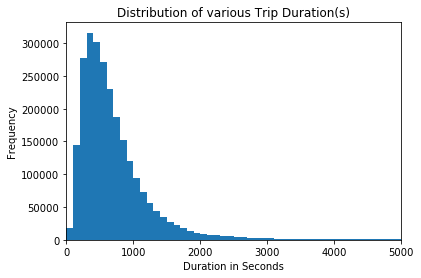

In [21]:
binedges = np.arange(0, df['duration_sec'].max() + 100 , 100)
plt.hist(data = df , x = 'duration_sec' , bins = binedges)
plt.xlim(0,5000)
plt.title('Distribution of various Trip Duration(s)')
plt.xlabel('Duration in Seconds')
plt.ylabel('Frequency') 

> Distribution of various Trip Durations is right-skewed , I will convert seconds to mins to be more understandable and i will apply a logarithmic transformation to x-axis

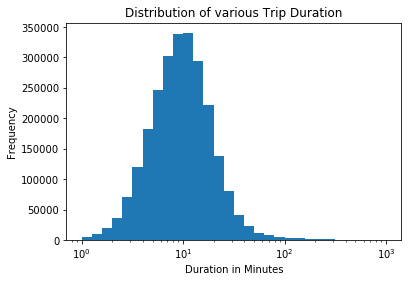

In [22]:
# Converting the trip durations from seconds to minutes 
df['duration_min'] = df['duration_sec'] / 60

binedges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df , x = 'duration_min' , bins = binedges);
plt.xticks(ticks,labels);
plt.title('Distribution of various Trip Duration')
plt.xlabel('Duration in Minutes');
plt.ylabel('Frequency')
plt.xscale('log');

> We can now interpret from the above plot most of users prefered to rent bikes for short time ( 10 mins )

>  looking at the highest common stations between users.

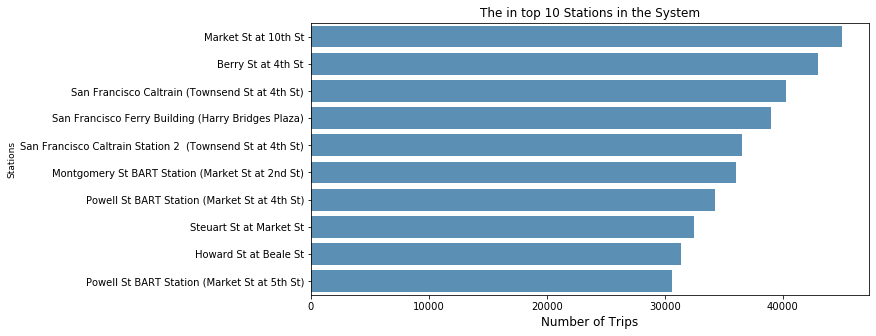

In [23]:
base_color = sb.color_palette()[0]
stations_count  = df['start_station_name'].value_counts()
stations_count = stations_count[:10,]
plt.figure(figsize=(10,5))
sb.barplot(y=stations_count.index, x=stations_count.values, alpha=0.8,color=base_color)
plt.title('The in top 10 Stations in the System')
plt.xlabel('Number of Trips', fontsize=12)
plt.ylabel('Stations', fontsize=9)
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I see Duration distribution after i performed transformation on second_duration variable which results the most common duration is about 10 mins.
> 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I have created new fields such as ( timing - duration) to facilitate the conduct of mathematical calculations and understand the data in a better way.
> I did this because i look on data from above view i found two main things :
   1- Categorical Data
   2- Time Data
  i build my transformations on this view.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).


## 1- User type split for GoBike sharing system

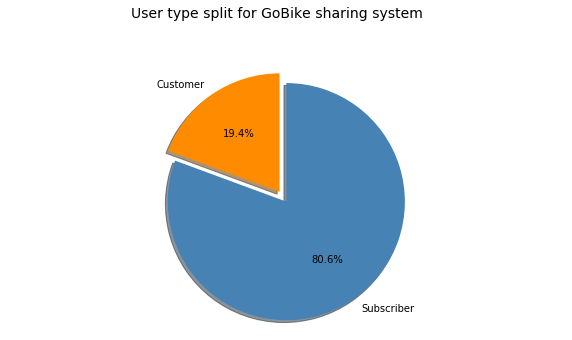

In [24]:
# calculating % split for the user type
customer = df.query('user_type == "Customer"')['bike_id'].count()
subscriber = df.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df['bike_id'].count()
subscriber_proportion = subscriber / df['bike_id'].count()
plt.figure(figsize = [10, 5])
labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14);    

## 2- Trip duration (sec) boxplot per user type

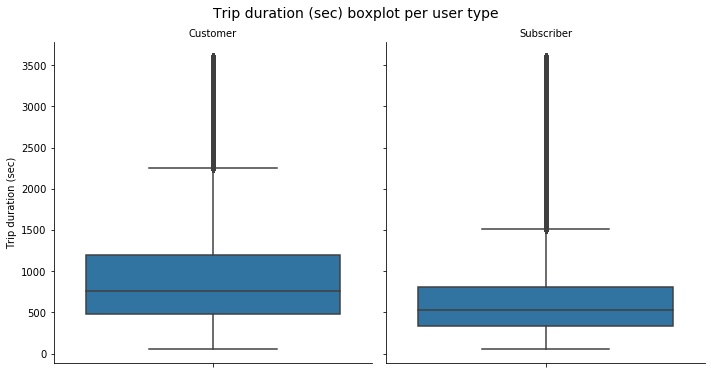

In [25]:
# code for the (boxplot) duration (sec) distribution per user type

data = df.query('duration_sec < 3600')
g = sb.catplot(data=data, y='duration_sec', col="user_type", kind='box',
            color = base_color)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration (sec)")
g.fig.suptitle('Trip duration (sec) boxplot per user type', y=1.03, fontsize=14);

## 3- Average for duration mins by sharing bike or not 

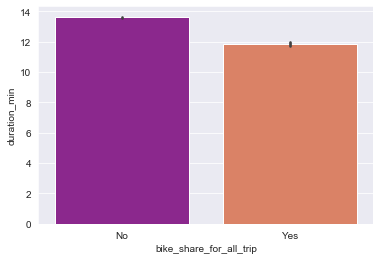

In [26]:
sb.set_style('darkgrid') 
  
# plot the graph using the default estimator mean 
sb.barplot(x ='bike_share_for_all_trip', y ='duration_min', data = df, palette ='plasma') 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The main Relationship i found  :- 
   the percentage for the type of users ( customer , subscriber). 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## 4- Usage ber Month

Text(0, 0.5, 'Bike Trips')

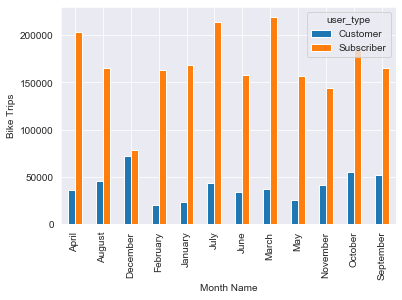

In [27]:
# df.start_time_month_name = (pd.to_datetime(df.start_time_month_name, format='%d-%b'))
#Count trips by Month 
usage_ber_month = pd.pivot_table(df,values='duration_sec', aggfunc='count',
                            index=['start_time_month_name'],
                            columns='user_type')
usage_ber_month.plot(kind='bar')
plt.xlabel('Month Name')
plt.ylabel('Bike Trips')

## 5- Hourly usage of the bike sharing system

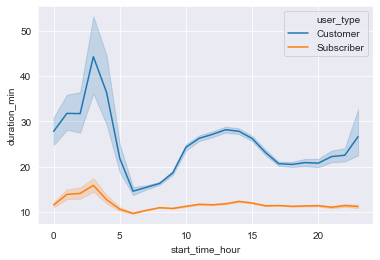

In [28]:
sb.lineplot(data=df, x='start_time_hour', y='duration_min',hue='user_type')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The main Relationship i was found  :- 
   1- i found the performance of every month for the company.
   2- i found the rush hour on the company between ( 3 to 4 ) 

### Were there any interesting or surprising interactions between features?

> in plot number 4 i found in december the performance for subscribers is near from the performance for customers ,the lowest in subscribers and highest in customers

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!